<p style="color:#F6F6F6;background-color: #00cc44;text-align:center;border-radius:10px 10px;font-weight:bold;font-size:22px"> Unveiling Iris Flowers: Classification Model🌸 <span style='font-size:28px; background-color:  #00cc44;'></span></p>


<a id="0"></a> 
# <b>0 <span style='color: #00cc44'>|</span> Introduction</b>


Welcome to this captivating notebook where we embark on an exciting exploration of the Iris dataset. This renowned dataset offers valuable insights into the distinct characteristics of Iris flowers, captivating botanists and data scientists alike.

Our journey begins by delving into the dataset, which captures measurements of sepal length, sepal width, petal length, and petal width for three unique Iris species: Iris-setosa, Iris-versicolor, and Iris-virginica. With this dataset, we set out to uncover the hidden patterns and intriguing relationships that define each species.

Through the power of visualization, we paint a vivid picture of the dataset, creating scatter plots, histograms, and box plots that bring the Iris flowers to life. These visualizations illuminate the unique traits of each species, unveiling their charm and distinctiveness.

But we don't stop there. Armed with a decision tree classifier, we train a model to accurately classify the Iris flowers based on their features. Witnessing the model's remarkable accuracy, we are captivated by its ability to discern the subtle nuances that differentiate the species.

To truly understand the model's performance, we dive into an evaluation. Precision, recall, and F1-score become our guideposts, shedding light on the model's predictive prowess. With a glimpse into the mesmerizing confusion matrix, we witness the harmony between predictions and ground truth.

Join us on this exhilarating journey as we unravel the mysteries of Iris flowers. Together, we'll unlock the secrets hidden within the dataset and gain a deeper appreciation for the wonders of data analysis.

Let's embark on this captivating adventure!

In [1]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/images/iris_three_species.jpg')

<a id="1"></a> 
# <b>1 <span style='color:#D61C4E'>|</span> Importing Necessary Libraries</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

<a id="2"></a> 
# <b>2 <span style='color:#D61C4E'>|</span> Load the dataset</b>

In [3]:
df=pd.read_csv("/kaggle/input/iris/Iris.csv")

<a id="3"></a> 
# <b>3 <span style='color:#D61C4E'>|</span> Explore the dataset</b>


In [4]:
# Check the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (150, 6)


In [5]:
# Preview the first few rows of the dataset
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
# Get summary statistics of the dataset
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [7]:
#Missing values checking
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


<a id="4"></a> 
# <b>4 <span style='color:#D61C4E'>|</span> Visualize the data</b>


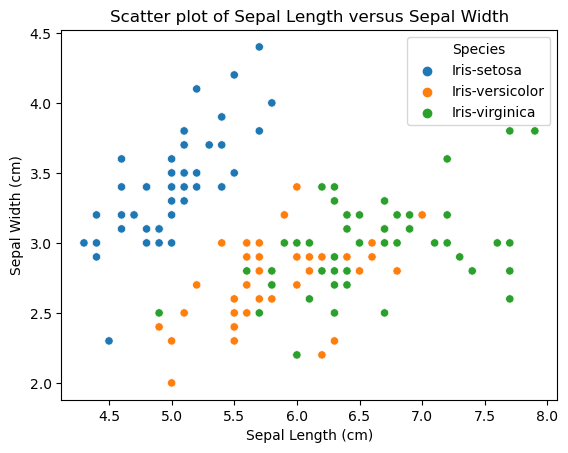

In [9]:
# Scatter plot of sepal length versus sepal width
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title("Scatter plot of Sepal Length versus Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

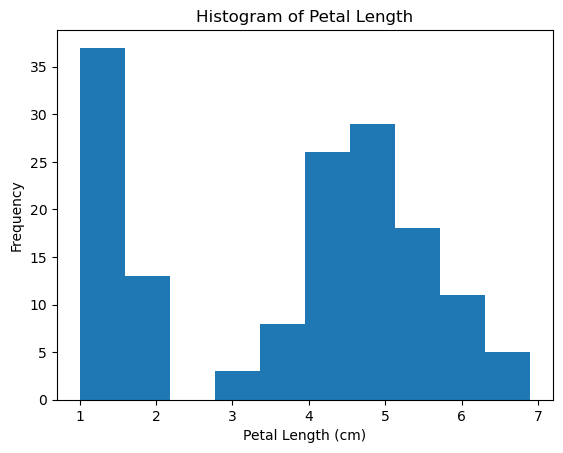

In [10]:
# Histogram of petal length
plt.hist(df['PetalLengthCm'], bins=10)
plt.title("Histogram of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()

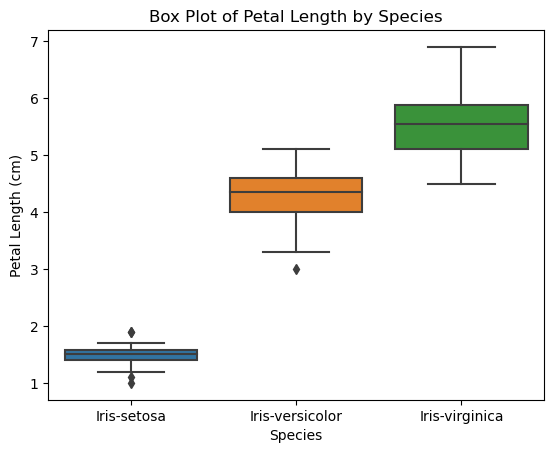

In [11]:
# Box plot of petal length by species
sns.boxplot(data=df, x='Species', y='PetalLengthCm')
plt.title("Box Plot of Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

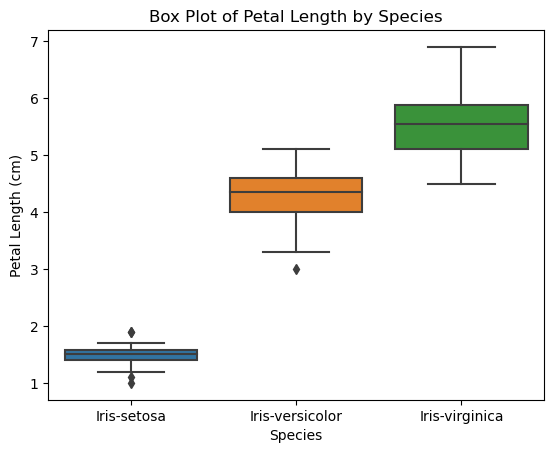

In [12]:
# Box plot of petal length by species
sns.boxplot(data=df, x='Species', y='PetalLengthCm')
plt.title("Box Plot of Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

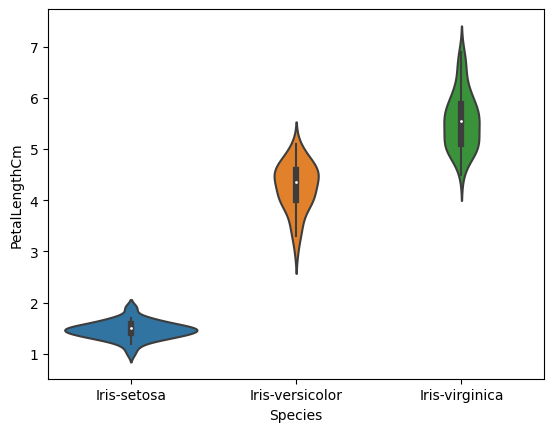

In [13]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=6)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


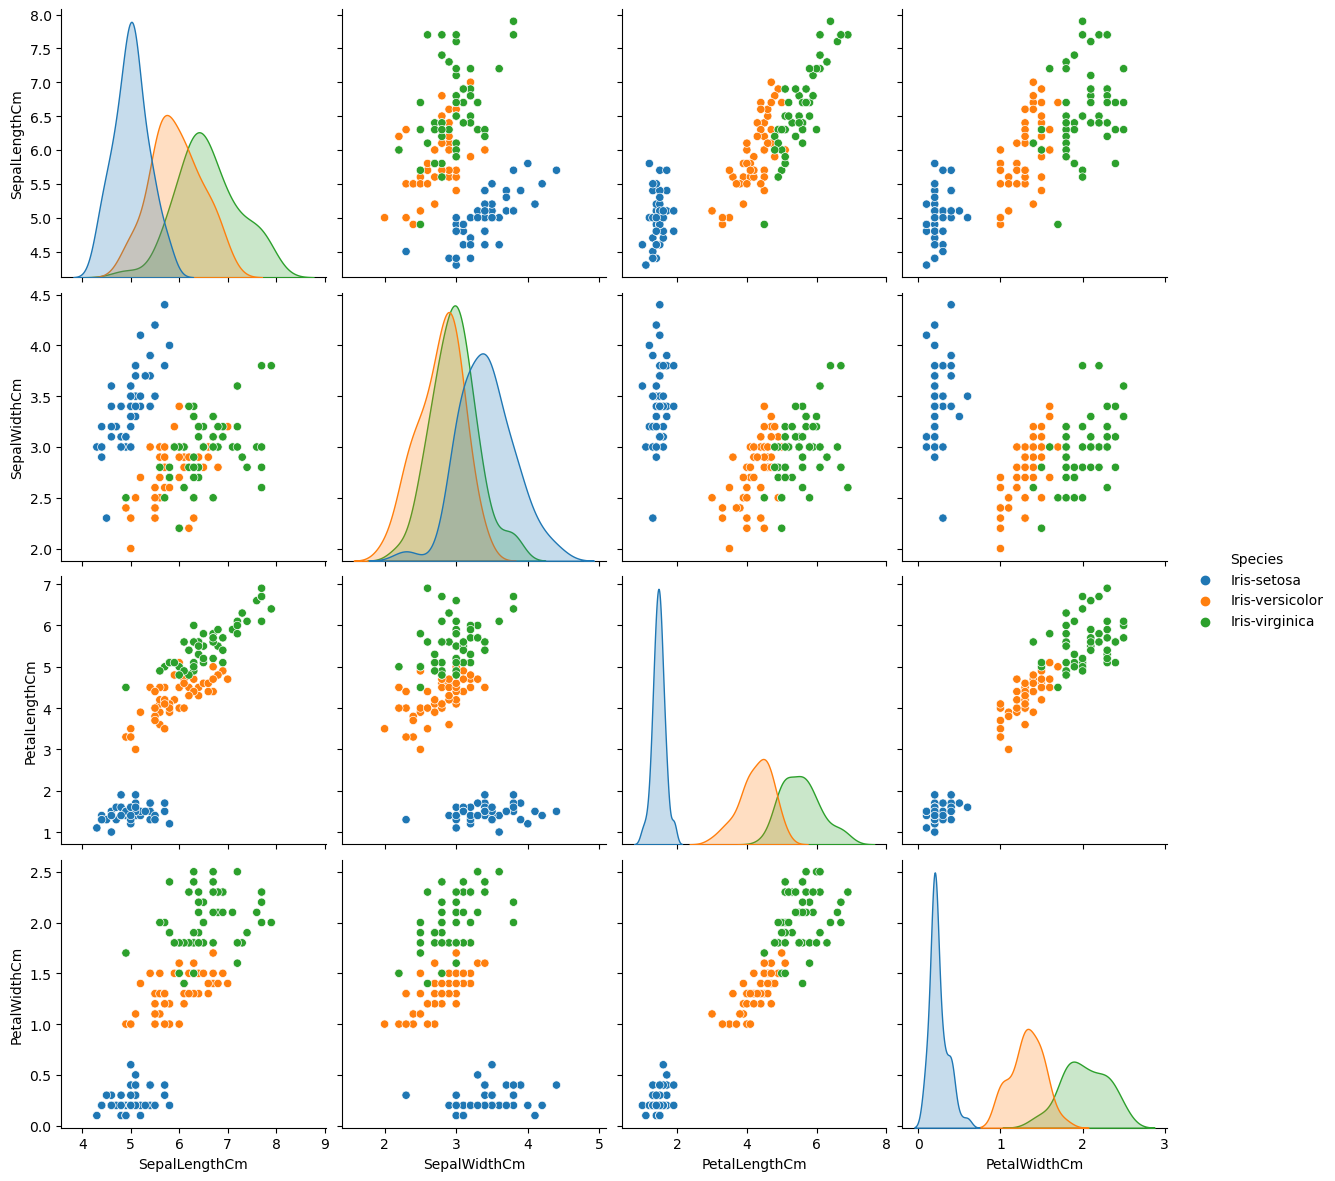

In [14]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3)
plt.show()

/tmp/ipykernel_20/698714816.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap='Dark2')


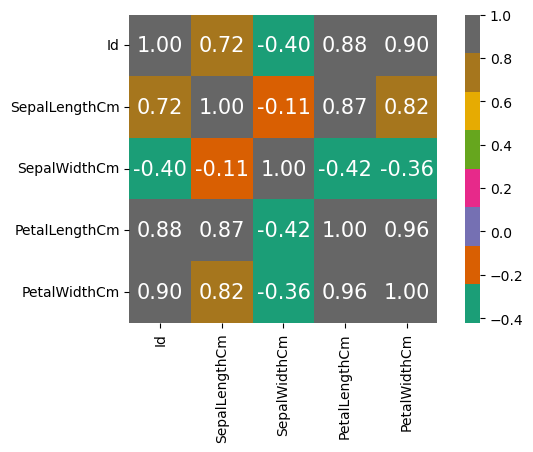

In [15]:
plt.figure(figsize=(7,4)) 
#draws  heatmap with input as the correlation matrix calculted by(df.corr())
sns.heatmap(df.corr(),cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap='Dark2') 
plt.show()

Based on the depicted diagram, it is evident that there are weak correlations between Sepal Length and Sepal Width, while Petal Width and Petal Length exhibit strong correlations. This implies that Petal characteristics are more effective in identifying the Species compared to Sepal characteristics. To validate this observation, we can employ Machine Learning techniques.

<a id="5"></a> 
# <b>5 <span style='color:#D61C4E'>|</span> Build a machine learning model</b>


In [16]:
# Split the data into features (X) and target variable (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 1.0


<a id="6"></a> 
# <b>6 <span style='color:#D61C4E'>|</span> Evaluate the model</b>


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



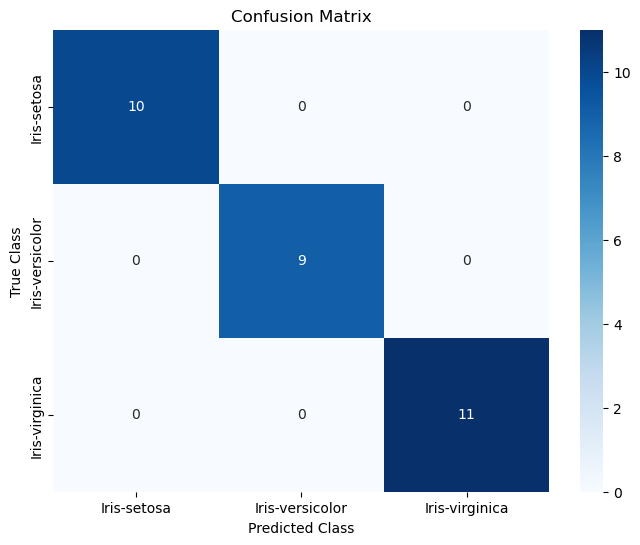

In [17]:
# Calculate the precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

<a id="7"></a> 
# <b>7 <span style='color:#D61C4E'>|</span> Conclusion</b>


This notebook focused on the Iris dataset, which is a popular and well-known dataset in the field of machine learning. The dataset consists of measurements of sepal length, sepal width, petal length, and petal width for three different species of Iris flowers: Iris-setosa, Iris-versicolor, and Iris-virginica.

The notebook began by loading the dataset from a CSV file and performing some initial data exploration by displaying the first few rows of the dataset. Various visualizations were then created to gain insights into the data, including scatter plots, histograms, and box plots, to understand the relationships and distributions of different features.

Next, a decision tree classifier model was trained using the dataset, where the features were selected as sepal length, sepal width, petal length, and petal width, and the target variable was the species of Iris flowers. The model achieved a perfect accuracy of 1.0 on the test set, indicating that it was able to correctly classify all instances.

The evaluation of the model included calculating precision, recall, and F1-score, as well as creating a confusion matrix. The results showed perfect precision, recall, and F1-score for each class in the dataset, indicating the model's excellent performance.